In [1]:
class Value():
    def __init__(self, value, parents=[], parent_op=None):
        self.value = value
        self.parents = parents
        self.parent_op = parent_op

    def __repr__(self):
        return str(self.value)
    
    def __add__(self, other):
        if not isinstance(other, Value): other = Value(other)
        return Value(self.value + other.value, [self, other], '+')
    
    def __sub__(self, other):
        if not isinstance(other, Value): other = Value(other)
        return Value(self.value - other.value, [self, other], '-')
    
    def __mul__(self, other):
        if not isinstance(other, Value): other = Value(other)
        return Value(self.value * other.value, [self, other], '*')
    
    def __pow__(self, other):
        if not isinstance(other, Value): other = Value(other)
        return Value(self.value ** other.value, [self, other], '**')

In [2]:
from graphviz import Digraph

def print_graph(node):
    '''Prints out a node's dependency graph. Traverses breadth-first.'''
    print(node)
    parents = node.parents
    while len(parents) != 0:
        print(*parents)
        parents = [grandparent for parent in parents 
                               for grandparent in parent.parents]
     
def draw_graph(node):
    '''Draws a node's dependency graph with graphviz. Traverses depth-first, pre-order.'''
    def _draw_node(node):
        '''Draws / adds a single node to the graph.'''
        if node.parent_op is None: 
            dot.node(str(id(node)), f'value: {node.value}')
        else:
            dot.node(str(id(node)), f'{node.parent_op} | value: {node.value}')
            
    def _draw_edge(parent, node):
        '''Draws / adds a single directed edge to the graph (parent -> node).'''
        dot.edge(str(id(parent)), str(id(node)))
    
    def _draw_parents(node):
        '''Traverses recursively, drawing the parent at the child's step (in order to draw the edge).'''
        for parent in node.parents:
            _draw_node(parent)
            _draw_edge(parent, node)
            _draw_parents(parent)
   
    dot = Digraph(graph_attr={'rankdir': 'BT'}, node_attr={'shape': 'record'})  # Draw the graph bottom-top, i.e. output at the top
    _draw_node(node)                             # Draw the root / output      
    _draw_parents(node)                          # Draw the rest of the graph
    
    return dot

3
1 2


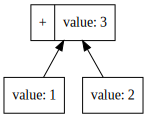

In [3]:
a = Value(1)
b = Value(2)
c = a + b

print_graph(c)
draw_graph(c)

10
3 7
1 2 3 4


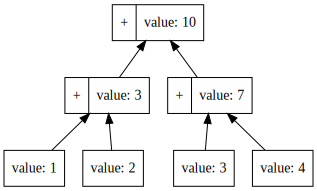

In [4]:
a = Value(1)
b = Value(2)
c = Value(3)
d = Value(4)
e = a + b
f = c + d
g = e + f


print_graph(g)
draw_graph(g)

In [5]:
print_graph(g)

10
3 7
1 2 3 4


6
3 3
1 2
1 2


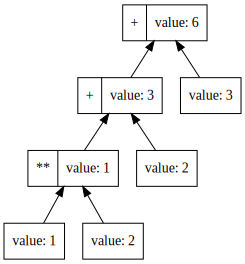

In [6]:
a = Value(1)
b = Value(2)
c = Value(3)
d = a**2 + b + c

print_graph(d)
draw_graph(d)